In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pathlib
import scipy

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.inspection import permutation_importance

from IPython.display import display

In [3]:
data_path = '/home/vlad/Документы/sparse.npz'
y_path = '/home/vlad/Документы/y.csv'

In [4]:
df_all_data = scipy.sparse.load_npz(data_path)
y = pd.read_csv(y_path)["is_alarm"]

In [5]:
tss = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tss.split(df_all_data):
    X_train, X_test = df_all_data[train_index], df_all_data[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [6]:
feature_names = ['day_tempmax', 'day_tempmin', 'day_temp', 'day_dew',
       'day_humidity', 'day_precip', 'day_precipcover', 'day_solarradiation',
       'day_solarenergy', 'day_uvindex', 'day_moonphase', 'hour_temp',
       'hour_humidity', 'hour_dew', 'hour_precip', 'hour_precipprob',
       'hour_snow', 'hour_snowdepth', 'hour_windgust', 'hour_windspeed',
       'hour_winddir', 'hour_pressure', 'hour_visibility', 'hour_cloudcover',
       'hour_solarradiation', 'hour_uvindex', 'hour_severerisk', 'region_id',
       'hour_conditions_id']


In [7]:
def run_model(model):
    Y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, Y_pred)
    fpr, tpr, _thersholds = metrics.roc_curve(y_test, Y_pred)
    auc_list = round(metrics.auc(fpr, tpr),2)
    cm_list =  confusion_matrix(y_test, Y_pred)

    fig = plt.figure(figsize = (15,15))
    sub = fig.add_subplot(2,3,1).set_title(f"{model}")
    cm_plot = sns.heatmap(cm_list, annot=True, cmap = "Blues_r")
    cm_plot.set_xlabel("Predicted values")
    cm_plot.set_ylabel("Actual values")
    plt.show()

    report = classification_report(y_test, Y_pred, target_names=["Actual", "Pred"])
    display(report)

# RandomForestClassifier

In [8]:
RFC = pd.read_pickle(os.path.join(pathlib.Path().resolve(), './data/models/RFC.pkl'))

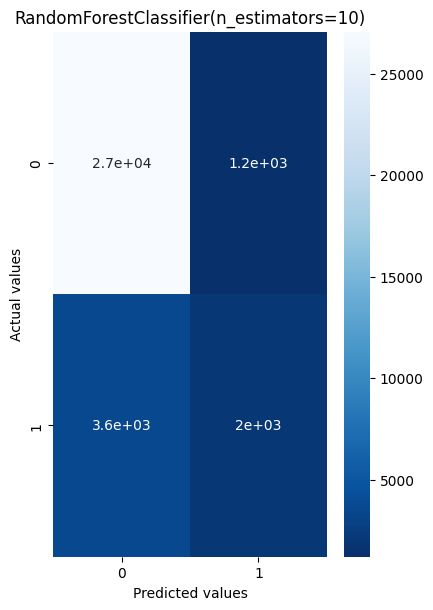

'              precision    recall  f1-score   support\n\n      Actual       0.88      0.96      0.92     28282\n        Pred       0.62      0.35      0.45      5620\n\n    accuracy                           0.86     33902\n   macro avg       0.75      0.66      0.68     33902\nweighted avg       0.84      0.86      0.84     33902\n'

In [9]:
run_model(RFC)

In [10]:
feature_coefs = RFC.feature_importances_[:len(feature_names)]

In [11]:
features = list(zip(feature_names, feature_coefs))
features

[('day_tempmax', 0.02674697192218085),
 ('day_tempmin', 0.02555922915870754),
 ('day_temp', 0.02682831178006279),
 ('day_dew', 0.02714382855729244),
 ('day_humidity', 0.026368645868820914),
 ('day_precip', 0.013413647663940577),
 ('day_precipcover', 0.010779707447777568),
 ('day_solarradiation', 0.02690199936512449),
 ('day_solarenergy', 0.026874647710924137),
 ('day_uvindex', 0.013198361429512369),
 ('day_moonphase', 0.00011880987453957263),
 ('hour_temp', 0.0641561823472303),
 ('hour_humidity', 0.06630915786346968),
 ('hour_dew', 0.05976423144192736),
 ('hour_precip', 0.005568171920012212),
 ('hour_precipprob', 0.003348801583414191),
 ('hour_snow', 0.0009217008889025995),
 ('hour_snowdepth', 0.0065531326860946105),
 ('hour_windgust', 0.06115651305490874),
 ('hour_windspeed', 0.05435840818194457),
 ('hour_winddir', 0.0613021514913415),
 ('hour_pressure', 0.05193538935388537),
 ('hour_visibility', 0.02211870302445645),
 ('hour_cloudcover', 0.04496169647093907),
 ('hour_solarradiation',

In [12]:
sorted_features = sorted(features, key=lambda x: x[1], reverse=True)[:20]
sorted_features

[('hour_humidity', 0.06630915786346968),
 ('hour_temp', 0.0641561823472303),
 ('hour_winddir', 0.0613021514913415),
 ('hour_windgust', 0.06115651305490874),
 ('hour_dew', 0.05976423144192736),
 ('hour_solarradiation', 0.057447776230102374),
 ('hour_windspeed', 0.05435840818194457),
 ('hour_pressure', 0.05193538935388537),
 ('hour_cloudcover', 0.04496169647093907),
 ('hour_uvindex', 0.0357621421031151),
 ('day_dew', 0.02714382855729244),
 ('day_solarradiation', 0.02690199936512449),
 ('day_solarenergy', 0.026874647710924137),
 ('day_temp', 0.02682831178006279),
 ('day_tempmax', 0.02674697192218085),
 ('day_humidity', 0.026368645868820914),
 ('day_tempmin', 0.02555922915870754),
 ('region_id', 0.022761299490098644),
 ('hour_visibility', 0.02211870302445645),
 ('hour_conditions_id', 0.017395120657472788)]

In [13]:
feature_names = [x[0] for x in sorted_features]
feature_weights = [x[1] for x in sorted_features]


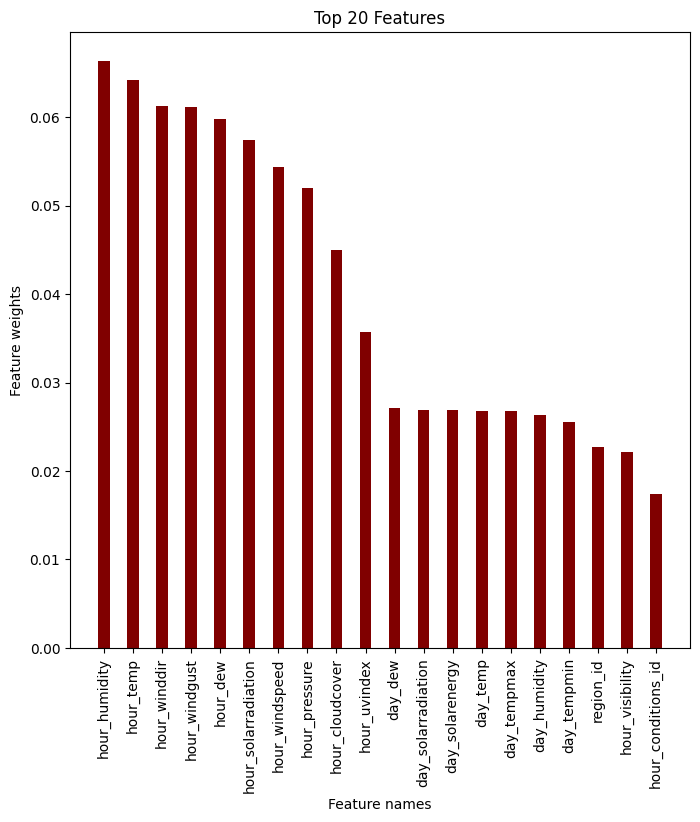

In [14]:
plt.figure(figsize=(8, 8))
plt.bar(feature_names, feature_weights, color ='maroon',
        width = 0.4)

plt.xlabel("Feature names")
plt.ylabel("Feature weights")
plt.title("Top 20 Features")
plt.xticks(rotation=90)
plt.show()

# LogisticRegression

In [15]:
LR = pd.read_pickle(os.path.join(pathlib.Path().resolve(), './data/models/LR.pkl'))

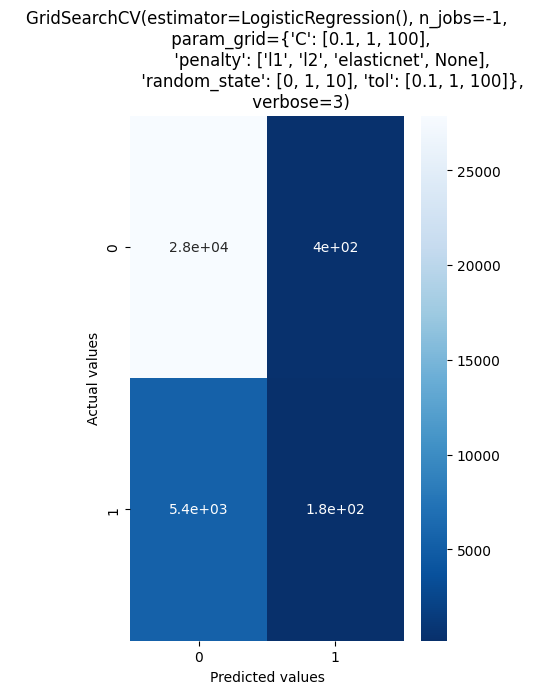

'              precision    recall  f1-score   support\n\n      Actual       0.84      0.99      0.91     28282\n        Pred       0.31      0.03      0.06      5620\n\n    accuracy                           0.83     33902\n   macro avg       0.57      0.51      0.48     33902\nweighted avg       0.75      0.83      0.76     33902\n'

In [16]:
run_model(LR)

In [ ]:
r = permutation_importance(LR, X_test.toarray(), y_test, n_repeats=5, random_state=0)    

# Multi-Layer Perceptrone

In [17]:
MLP = pd.read_pickle(os.path.join(pathlib.Path().resolve(), './data/models/MLP.pkl'))

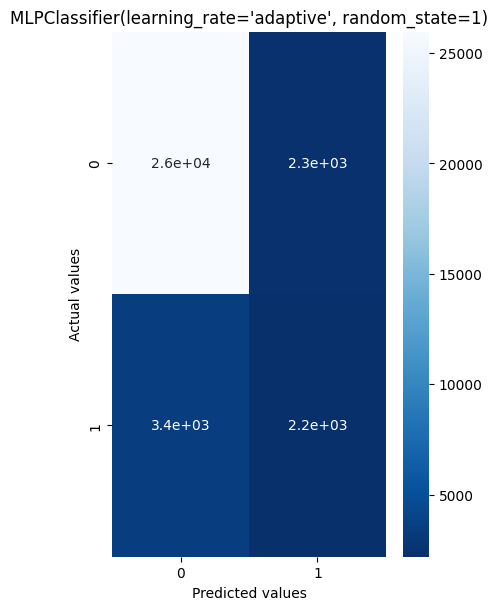

'              precision    recall  f1-score   support\n\n      Actual       0.88      0.92      0.90     28282\n        Pred       0.49      0.39      0.43      5620\n\n    accuracy                           0.83     33902\n   macro avg       0.68      0.65      0.67     33902\nweighted avg       0.82      0.83      0.82     33902\n'

In [18]:
run_model(MLP)

In [ ]:
r = permutation_importance(MLP, X_test.toarray(), y_test, n_repeats=5, random_state=0) 